# Q.1)Delivery_Time -> Predict delivery time using sorting time

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.

IMPORTING LIBRARIES

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

IMPORTING DATA

In [44]:
data_time = pd.read_csv('delivery_time.csv')

In [45]:
data_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA

In [46]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [47]:
data_time.shape # to check data shape

(21, 2)

In [48]:
data_time.dtypes #check data types

Delivery Time    float64
Sorting Time       int64
dtype: object

In [49]:
corr_ = data_time.corr()

In [50]:
corr_# correlation coefficient

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

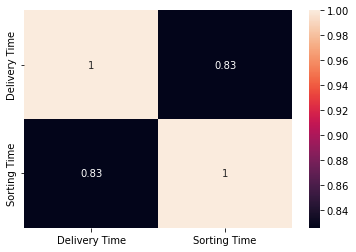

In [51]:
sns.heatmap(corr_,annot=True)

.There is a positive correlation between Delivery Time and Sorting Time

In [52]:
# This method gives us very nice descriptive statistics.
data_time.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


>The average Delivery Time and Sorting Time is 16.79 and 6.19 respectively

>The minimum delivery time is 8.00 and maximum delivery time is 29.00

>The minimum sorting time is 2.00 and maximum sorting time is 10.00

In [53]:
data_time.skew() , data_time.kurtosis()

(Delivery Time    0.352390
 Sorting Time     0.047115
 dtype: float64,
 Delivery Time    0.317960
 Sorting Time    -1.148455
 dtype: float64)

>From Skewness we can say that Delivery data is little bit positive skew and Sorting data is symmetric

>From Kurtosis we can say that there are no Outliers in our data since it is nearly equal to zero.

In [54]:
#finding null values
data_time.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

>There are no null values in data

<AxesSubplot:>

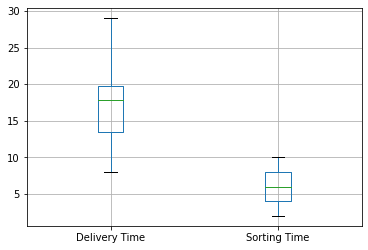

In [55]:
#Boxplot
data_time.boxplot()

>from the above Boxplot we can say that there are no outliers in data

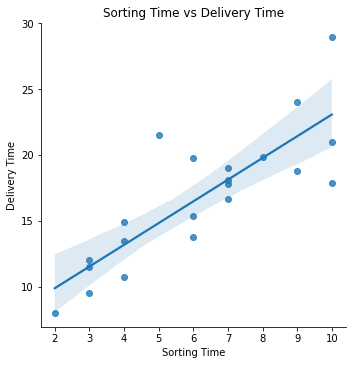

In [56]:
#To Check linearity
sns.lmplot(x='Sorting Time',y='Delivery Time',data=data_time)
plt.title("Sorting Time vs Delivery Time")
plt.show()

>by observing above plot we can say that the linearity condition fails.

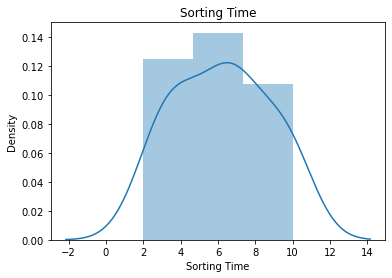

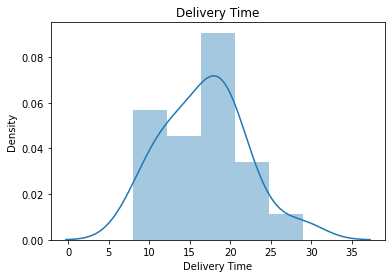

In [57]:
#checking Normality
sns.distplot(a=data_time['Sorting Time'])
plt.title('Sorting Time')
plt.show()

sns.distplot(a=data_time['Delivery Time'])
plt.title('Delivery Time')
plt.show()

>From above plots we can say that,
>for Sorting Time most of the data lie within the group 2 - 10
>for Delivery Time most of the data lie within the group 10 - 20

# Model Building and Model Training

In [58]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [59]:
data_time.columns=['Delivery',"Sorting"]

In [60]:
data_time.head()

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [62]:
#fitting model
linear_model=smf.ols("Delivery~Sorting",data=data_time).fit()

In [64]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        17:08:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#Parameters
linear_model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [66]:
#t-values and p-values
print(linear_model.tvalues ,'\n', linear_model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


In [69]:
#R & adj Squared values
(linear_model.rsquared,linear_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Transformation
1.Squareroot transformation

In [81]:
data_time_sqr_sort=np.sqrt(data_time["Sorting"])
data_time_sqr_sort

0     3.162278
1     2.000000
2     2.449490
3     3.000000
4     3.162278
5     2.449490
6     2.645751
7     1.732051
8     3.162278
9     3.000000
10    2.828427
11    2.000000
12    2.645751
13    1.732051
14    1.732051
15    2.000000
16    2.449490
17    2.645751
18    1.414214
19    2.645751
20    2.236068
Name: Sorting, dtype: float64

In [82]:
data_time_sqr=pd.DataFrame((data_time_sqr_sort,data_time["Delivery"])).T
data_time_sqr

,Sorting,Delivery
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

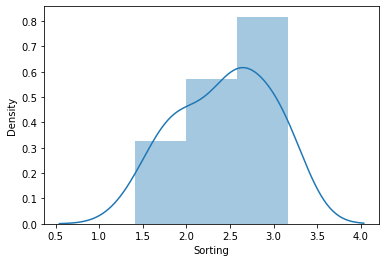

In [83]:
sns.distplot(data_time_sqr["Sorting"])

In [86]:
model_sqrt=smf.ols(("Delivery~Sorting"),data=data_time_sqr).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           2.61e-06
Time:                        17:24:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
Sorting        7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
model_sqrt.params

Intercept   -2.518837
Sorting      7.936591
dtype: float64

In [88]:
y_pred_sqrt=(-2.518837)+(7.936591)*(data_time_sqr["Sorting"])
y_pred_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
Name: Sorting, dtype: float64

In [90]:
print("r2score",r2_score(data_time_sqr["Delivery"],y_pred_sqrt))

r2score 0.6958062276308643


In [91]:
print("MAE",mean_absolute_error(data_time_sqr["Delivery"],y_pred_sqrt))

MAE 2.047327133749685


Model perform approximately same before squareroot transformation and after transformation

2.Log Transformation

In [94]:
data_time_log_sort=np.log(data_time["Sorting"])
data_time_log_sort

0     2.302585
1     1.386294
2     1.791759
3     2.197225
4     2.302585
5     1.791759
6     1.945910
7     1.098612
8     2.302585
9     2.197225
10    2.079442
11    1.386294
12    1.945910
13    1.098612
14    1.098612
15    1.386294
16    1.791759
17    1.945910
18    0.693147
19    1.945910
20    1.609438
Name: Sorting, dtype: float64

In [95]:
data_time_log=pd.DataFrame((data_time_log_sort,data_time["Delivery"])).T
data_time_log

,Sorting,Delivery
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


<AxesSubplot:xlabel='Sorting', ylabel='Density'>

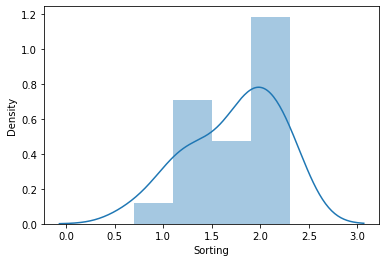

In [96]:
sns.distplot(data_time_log["Sorting"])

In [98]:
model_log=smf.ols(("Delivery~Sorting"),data=data_time_log).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           2.64e-06
Time:                        17:33:58   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
Sorting        9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
model_log.params

Intercept    1.159684
Sorting      9.043413
dtype: float64

In [101]:
y_pred_log=(1.159684)+(9.043413)*(data_time_log["Sorting"])
y_pred_log

0     21.982912
1     13.696516
2     17.363305
3     21.030093
4     21.982912
5     17.363305
6     18.757353
7     11.094889
8     21.982912
9     21.030093
10    19.964933
11    13.696516
12    18.757353
13    11.094889
14    11.094889
15    13.696516
16    17.363305
17    18.757353
18     7.428100
19    18.757353
20    15.714496
Name: Sorting, dtype: float64

In [103]:
print("r2score",r2_score(data_time_log["Delivery"],y_pred_log))

r2score 0.6954434611324167


In [106]:
print("MAE",mean_absolute_error(data_time_log["Delivery"],y_pred_log))

MAE 2.0473756009110695


Conclusion=1.Pvalue<0.05 model is accpeted